In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [83]:
df = pd.read_csv(r"C:\Users\oscar\Documents\games.csv")

In [84]:
meta = pd.read_json(r"C:\Users\oscar\Documents\games_metadata.json", lines=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [86]:
df.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True
9,19810,The Sum of All Fears,2008-10-10,True,False,False,Mostly Positive,75,33,9.99,9.99,0.0,True


In [87]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       50503 non-null  int64 
 1   description  50503 non-null  object
 2   tags         50503 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [88]:
# merge the game data and metadata
df = df.merge(meta, on='app_id')


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
 13  description     50503 non-null  object 
 14  tags            50503 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(5)
memory usage: 4.4+ MB


## Data Cleaning

In [90]:
df.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck', 'description', 'tags'],
      dtype='object')

### Drop 'description' column, cos not numeric and cat factor

In [91]:
# drop the 'description' column
df = df.drop(['description'], axis = 1)

### Drop missing and duplicate value

In [92]:
# drop empty row
df.isnull().sum(axis=1).sum()

0

In [93]:
df.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck', 'tags'],
      dtype='object')

In [94]:
import pandas as pd

# Assuming you have a DataFrame named df
# Convert lists to tuples in the 'tags' column
df['tags'] = df['tags'].apply(tuple)

# Drop duplicate rows and keep the first occurrence of each duplicated row
df.drop_duplicates(inplace=True)

# Restore tuples back to lists in the 'tags' column if needed
df['tags'] = df['tags'].apply(list)

# Check the DataFrame after dropping duplicates
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
 13  tags            50503 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(4)
memory usage: 4.0+ MB


In [95]:
# drop the 'app_id', 'title', 'date_release' columns, as they are the categorical and numeric factor
df = df.drop(['title', 'date_release'], axis = 1)

In [96]:
df.head()

,app_id,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,tags
0,13500,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,True,False,False,Positive,85,21,2.99,2.99,0.0,True,[Action]
2,113020,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


### Clean outliers

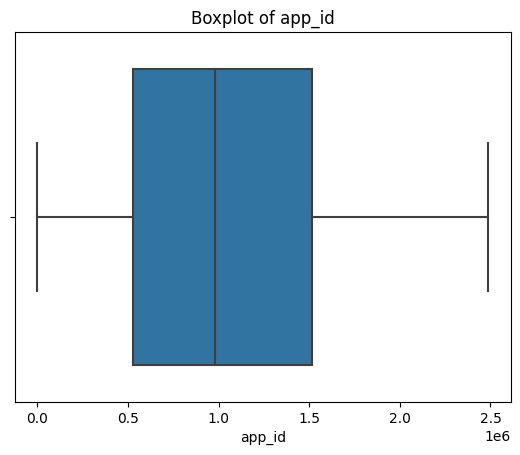

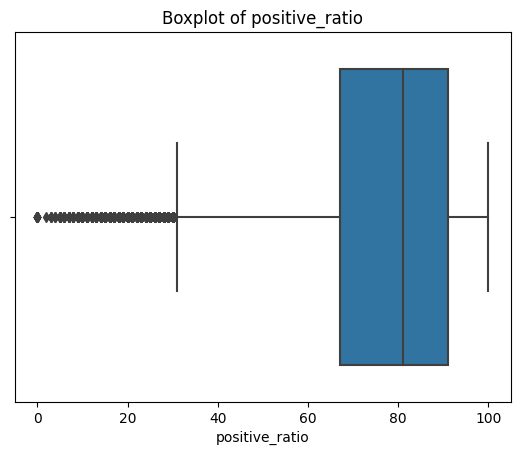

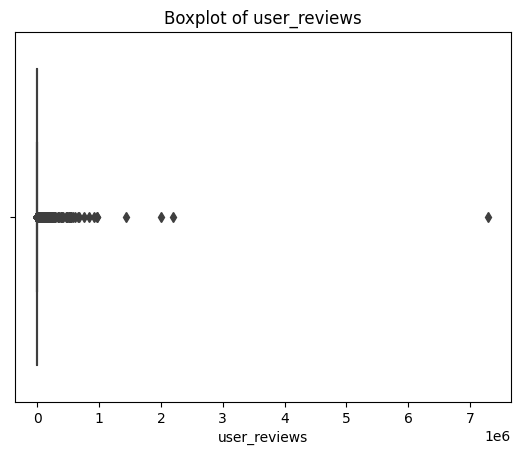

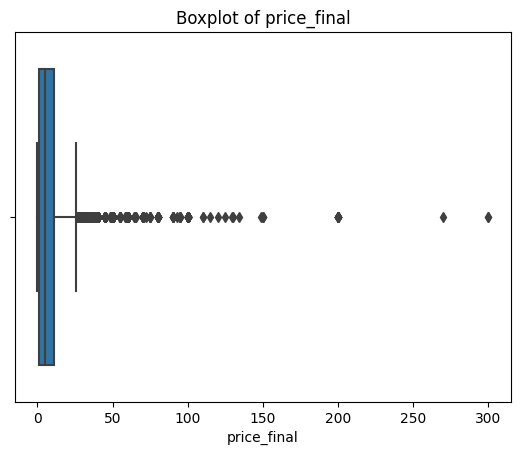

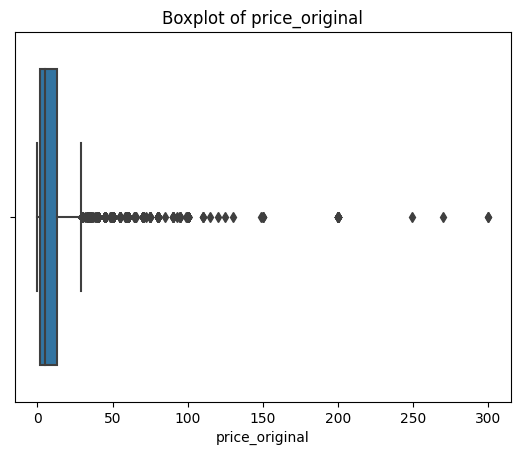

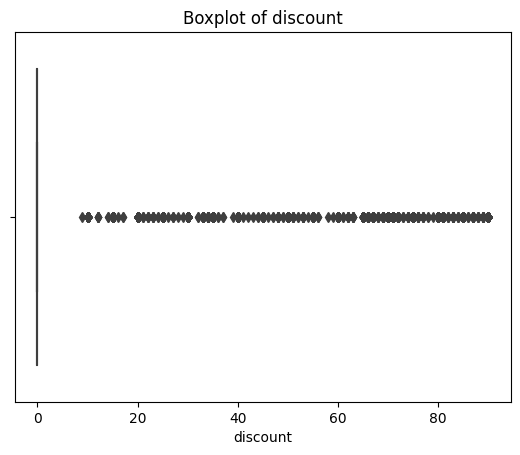

In [97]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Create separate boxplots for numerical columns
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(x=column, data=df)
    plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
    plt.show()

In [98]:
# create test 1
df_t1 = df

# create test 2
df_t2 = df

### Method 1: Outlier Formula - 1.5 IQR

In [99]:
# Step 1: Calculate the first quartile (Q1) and third quartile (Q3) of the column
Q1 = df_t1['user_reviews'].quantile(0.25)
Q3 = df_t1['user_reviews'].quantile(0.75)

# Step 2: Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Define the outlier thresholds (1.5 times the IQR)
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame to keep only the rows within the defined thresholds
df_t1 = df_t1[(df_t1['user_reviews'] >= lower_threshold) & (df_t1['user_reviews'] <= upper_threshold)]

### Method 2: 3 SD

In [100]:
# Step 1: Calculate the mean and standard deviation of the column
mean_value = df_t2['user_reviews'].mean()
std_deviation = df_t2['user_reviews'].std()

# Step 2: Define a threshold to identify outliers (3 standard deviations from the mean)
outlier_threshold = 3 * std_deviation

# Step 3: Filter the DataFrame to keep only the rows within the defined threshold
df_t2 = df_t2[abs(df_t2['user_reviews'] - mean_value) <= outlier_threshold]


In [101]:
# drop outliers for test 1
df_t1 = df_t1.drop(df_t1[df_t1['price_final'] > 50].index)

df_t1 = df_t1.drop(df_t1[df_t1['price_original'] > 50].index)

# drop outlier for test 2
df_t2 = df_t2.drop(df_t2[df_t2['price_final'] > 50].index)

df_t2 = df_t2.drop(df_t2[df_t2['price_original'] > 50].index)

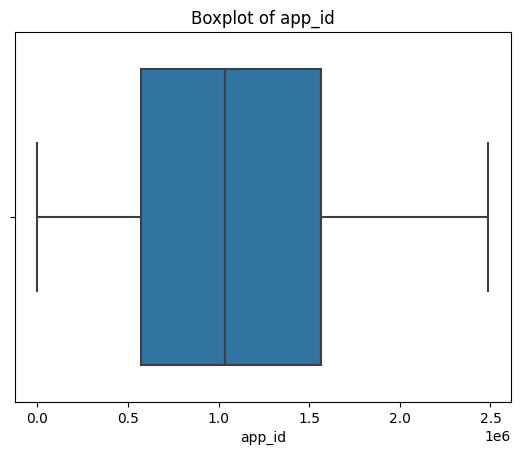

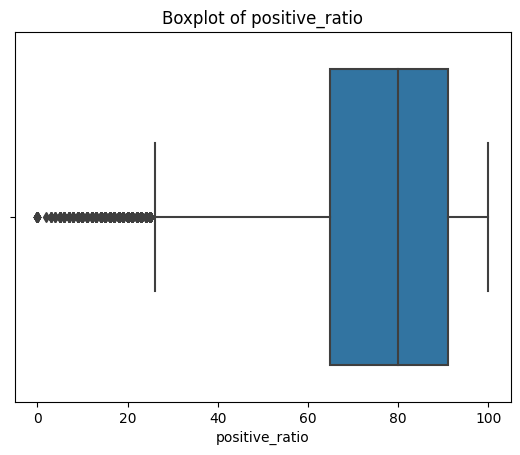

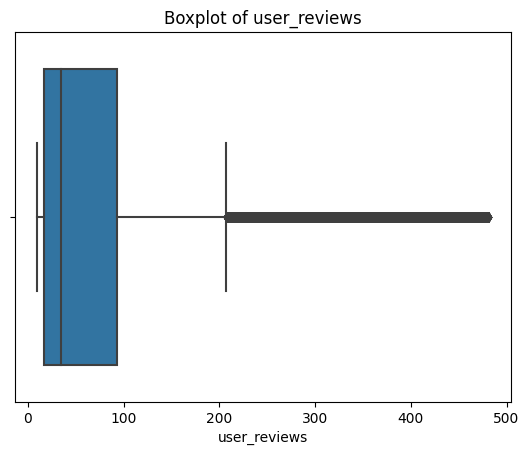

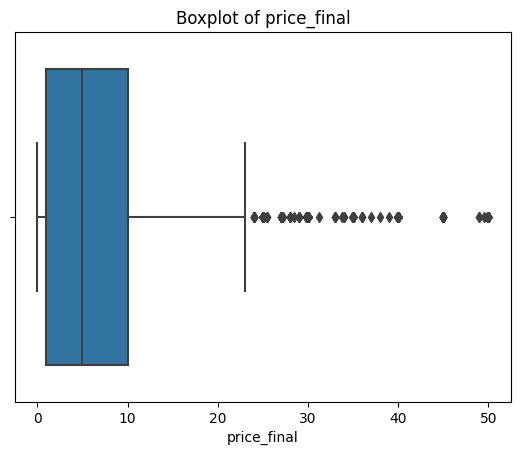

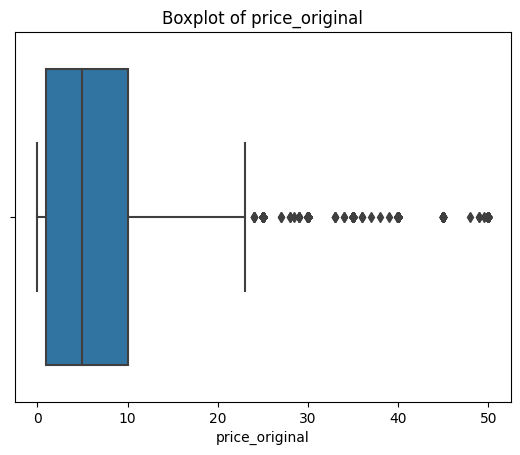

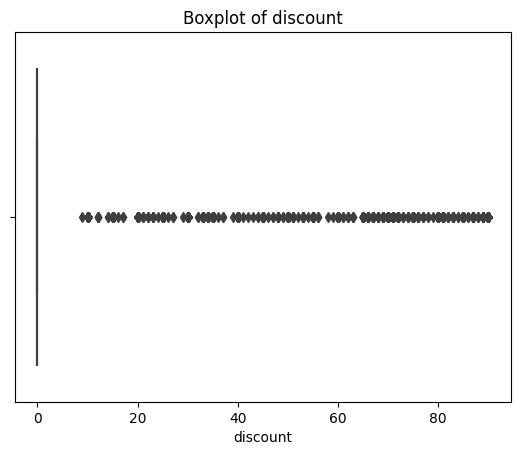

In [102]:
numerical_columns = df_t1.select_dtypes(include=['int', 'float']).columns

# Create separate boxplots for numerical columns
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(x=column, data=df_t1)
    plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
    plt.show()

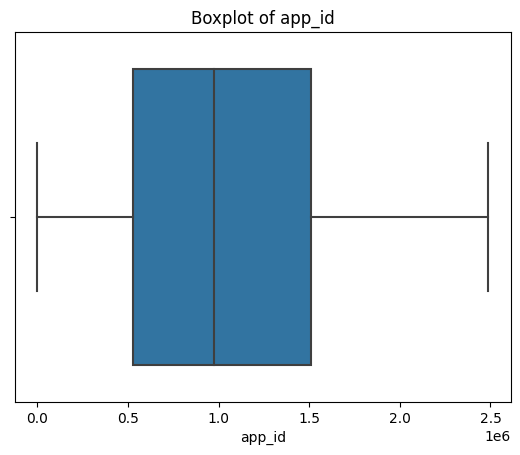

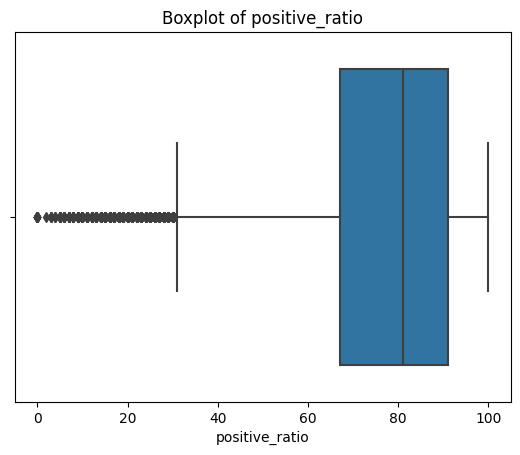

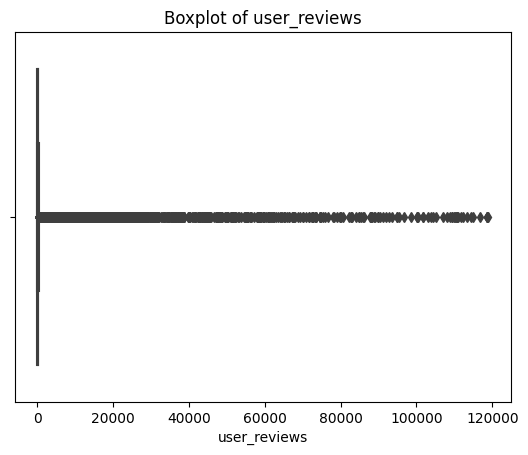

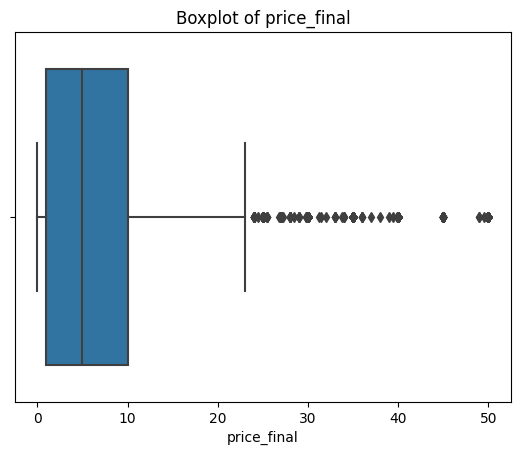

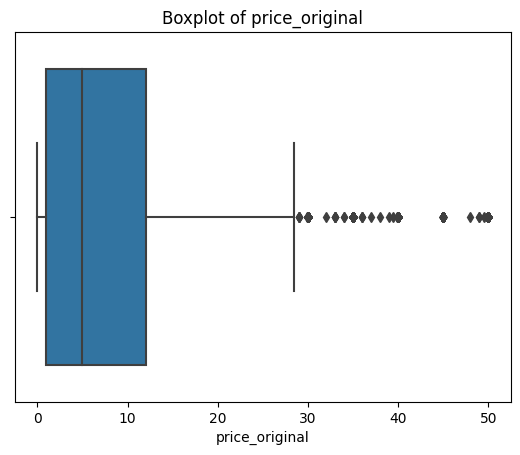

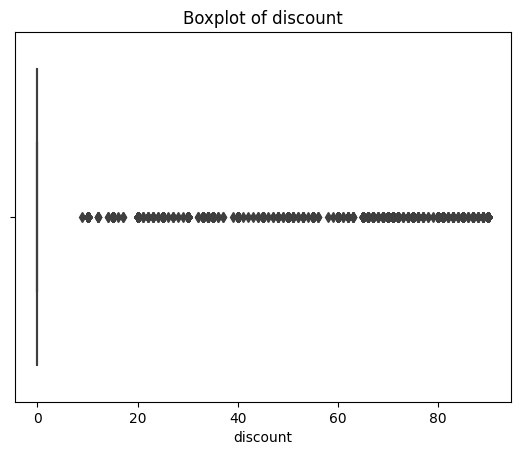

In [103]:
numerical_columns = df_t2.select_dtypes(include=['int', 'float']).columns

# Create separate boxplots for numerical columns
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(x=column, data=df_t2)
    plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
    plt.show()

In [104]:
df.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.050300e+04,50503.000000,5.050300e+04,50503.000000,50503.000000,50503.000000
mean,1.048405e+06,77.033622,1.776163e+03,8.549623,9.166772,5.716254
std,6.058853e+05,18.261259,3.912721e+04,11.468167,11.917905,18.779479
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.265205e+05,67.000000,1.900000e+01,0.990000,1.990000,0.000000
50%,9.793100e+05,81.000000,4.800000e+01,4.990000,4.990000,0.000000
75%,1.514985e+06,91.000000,2.040000e+02,10.990000,12.990000,0.000000
max,2.488153e+06,100.000000,7.297791e+06,299.990000,299.990000,90.000000


In [105]:
df_t1.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,4.218600e+04,42186.000000,42186.000000,42186.000000,42186.000000,42186.000000
mean,1.094045e+06,76.134547,77.363675,7.042153,7.557307,5.852178
std,6.032104e+05,18.867024,97.113432,7.967081,8.222626,19.024190
min,6.300000e+02,0.000000,10.000000,0.000000,0.000000,0.000000
25%,5.712425e+05,65.000000,17.000000,0.990000,0.990000,0.000000
50%,1.034885e+06,80.000000,35.000000,4.990000,4.990000,0.000000
75%,1.566828e+06,91.000000,93.000000,9.990000,9.990000,0.000000
max,2.488153e+06,100.000000,481.000000,49.990000,49.990000,90.000000


In [106]:
df_t2.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,4.988000e+04,49880.000000,49880.000000,49880.000000,49880.000000,49880.000000
mean,1.046132e+06,77.068404,933.091018,7.869450,8.432754,5.701464
std,6.044315e+05,18.258345,5404.719851,8.806451,9.085285,18.747949
min,2.000000e+01,0.000000,10.000000,0.000000,0.000000,0.000000
25%,5.261375e+05,67.000000,19.000000,0.990000,0.990000,0.000000
50%,9.770150e+05,81.000000,48.000000,4.990000,4.990000,0.000000
75%,1.509878e+06,91.000000,198.000000,9.990000,11.990000,0.000000
max,2.488153e+06,100.000000,118958.000000,49.990000,49.990000,90.000000


#### old_df

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   win             50503 non-null  bool   
 2   mac             50503 non-null  bool   
 3   linux           50503 non-null  bool   
 4   rating          50503 non-null  object 
 5   positive_ratio  50503 non-null  int64  
 6   user_reviews    50503 non-null  int64  
 7   price_final     50503 non-null  float64
 8   price_original  50503 non-null  float64
 9   discount        50503 non-null  float64
 10  steam_deck      50503 non-null  bool   
 11  tags            50503 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(2)
memory usage: 3.3+ MB


#### Method 1

In [108]:
df_t1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42186 entries, 1 to 50502
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          42186 non-null  int64  
 1   win             42186 non-null  bool   
 2   mac             42186 non-null  bool   
 3   linux           42186 non-null  bool   
 4   rating          42186 non-null  object 
 5   positive_ratio  42186 non-null  int64  
 6   user_reviews    42186 non-null  int64  
 7   price_final     42186 non-null  float64
 8   price_original  42186 non-null  float64
 9   discount        42186 non-null  float64
 10  steam_deck      42186 non-null  bool   
 11  tags            42186 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(2)
memory usage: 3.1+ MB


#### Method 2

In [109]:
df_t2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49880 entries, 0 to 50502
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          49880 non-null  int64  
 1   win             49880 non-null  bool   
 2   mac             49880 non-null  bool   
 3   linux           49880 non-null  bool   
 4   rating          49880 non-null  object 
 5   positive_ratio  49880 non-null  int64  
 6   user_reviews    49880 non-null  int64  
 7   price_final     49880 non-null  float64
 8   price_original  49880 non-null  float64
 9   discount        49880 non-null  float64
 10  steam_deck      49880 non-null  bool   
 11  tags            49880 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(2)
memory usage: 3.6+ MB


### The cleaning method 2 is better as it crop less records than method 1 and the change in the mean of the user reviews is smaller than method 1.

In [110]:
# set method 2 dataframe as the dataframe cleaned
df_clean = df_t2

In [111]:
df_clean.head()

,app_id,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,tags
0,13500,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,True,False,False,Positive,85,21,2.99,2.99,0.0,True,[Action]
2,113020,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [112]:
# show the statistic of the operating system
df_clean[['win', 'mac', 'linux', 'steam_deck']].apply(pd.value_counts)

,win,mac,linux,steam_deck
False,795,37091,41005,2
True,49085,12789,8875,49878


### Drop steam_deck columns as only 2 records without steam deck

In [113]:
df_clean = df_clean.drop('steam_deck', axis=1)

## Exploratory data analysis

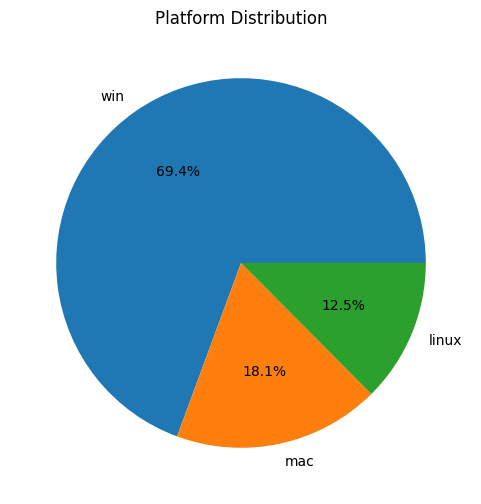

In [114]:
platform_counts = df_clean[['win', 'mac', 'linux']].sum()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%')
plt.title('Platform Distribution')
plt.show()

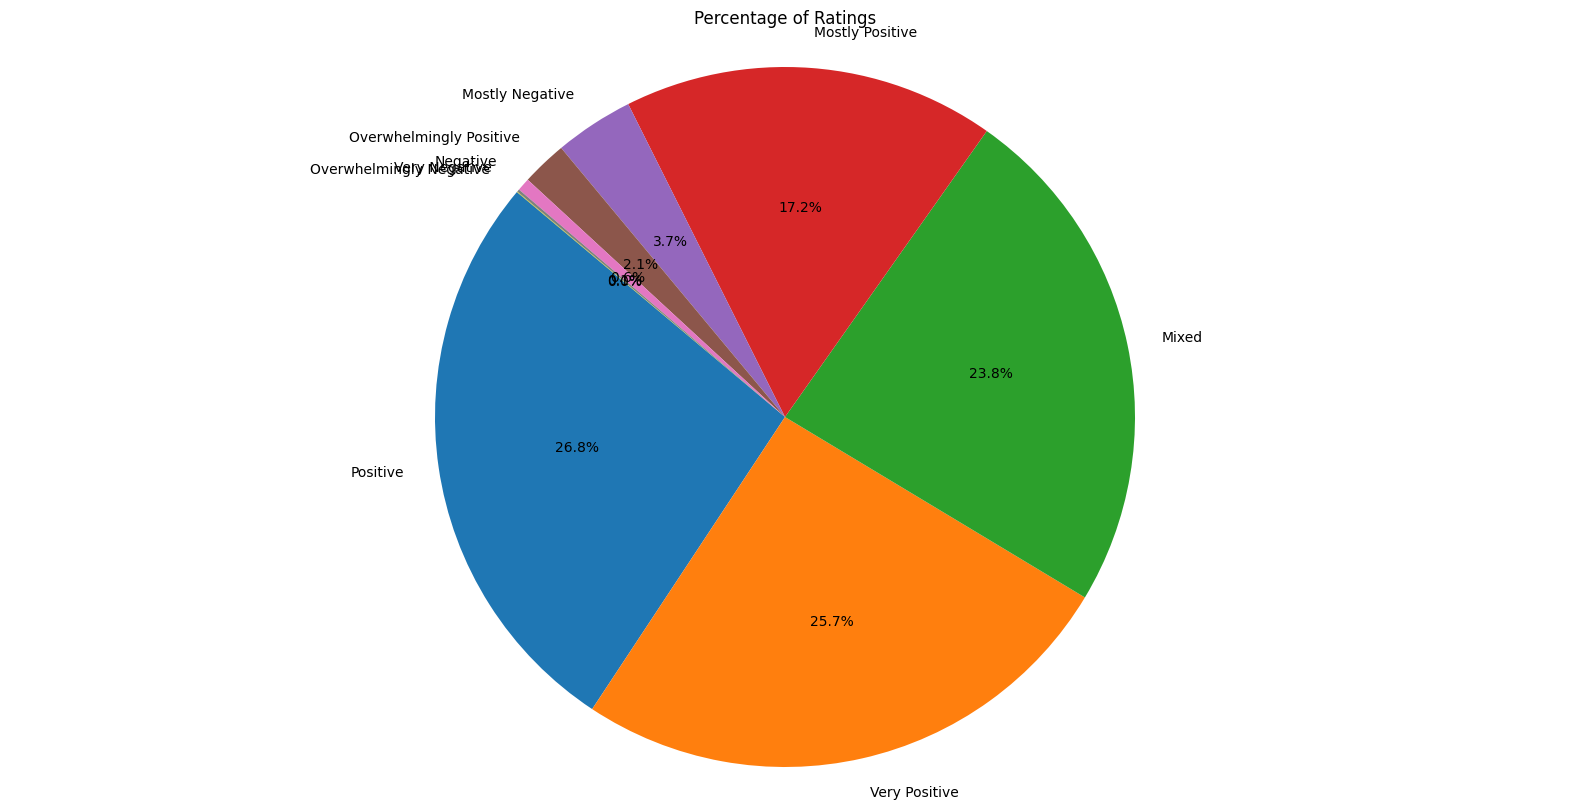

In [115]:
rating_percentage = df_clean['rating'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(20, 10))
plt.pie(rating_percentage, labels=rating_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Axes: xlabel='positive_ratio', ylabel='Count'>

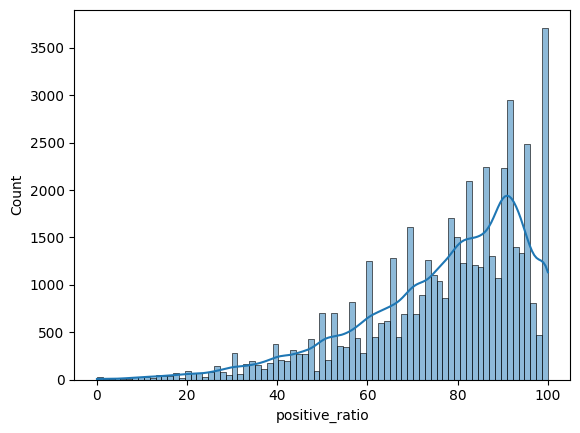

In [116]:
# plot the histograms for all three DataFrames together
sns.histplot(data=df_clean['positive_ratio'], kde=True)


# Feature Engineering

### FE for rating column

In [117]:
df_clean['rating'].unique()

array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Negative', 'Mostly Negative',
       'Overwhelmingly Negative', 'Very Negative'], dtype=object)

In [118]:
# create function for determining whether the game is having positive comment or not

def rating_cat(x):
    if x in ['Overwhelmingly Positive', 'Very Positive', 'Positive', 'Mostly Positive']:
        return 1
    else:
        return 0

#### Create column of showing whether the game is having positive rating or not

In [119]:
df_clean['positive_YN'] = df_clean['rating'].apply(rating_cat)

In [120]:
df_clean = df_clean.drop('rating', axis=1)

In [121]:
df_clean = df_clean.reset_index()

positive_YN
1    35796
0    14084
Name: count, dtype: int64


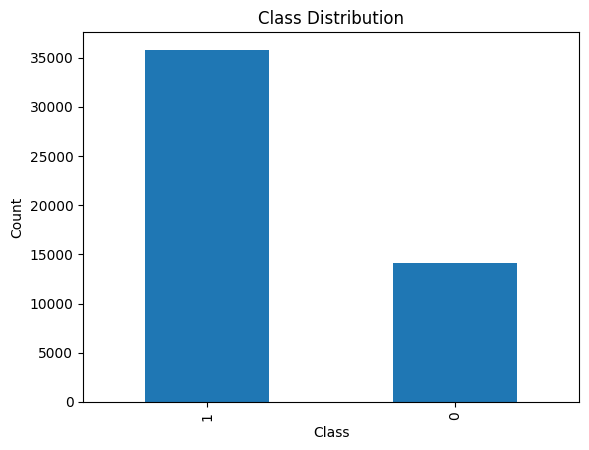

In [122]:
import pandas as pd

# Assuming you have your target variable as a pandas Series 'y'
class_counts = df_clean['positive_YN'].value_counts()
print(class_counts)

import matplotlib.pyplot as plt

class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

It shows imbalance distribution of the positive ratio, most of the game are positive

### FE for discount column

In [123]:
# function of whether the game has discount

def discount_YN(x):
    if x > 0:
        return 1
    else:
        return 0

In [124]:
df_clean['discount_YN'] = df_clean['discount'].apply(discount_YN)

### FE for tags column

Since tags information are keep in a list for each recor, we need to extract the tags from the list and change them to columns using one hot

In [125]:
# create testing 1
df_clean_t1 = df_clean

In [126]:
# explode the lists in the 'tags' column
df_clean_t1 = df_clean_t1.explode('tags')

In [127]:
df_clean.head()

,index,app_id,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,tags,positive_YN,discount_YN
0,0,13500,True,False,False,84,2199,9.99,9.99,0.0,"[Action, Adventure, Parkour, Third Person, Gre...",1,0
1,1,22364,True,False,False,85,21,2.99,2.99,0.0,[Action],1,0
2,2,113020,True,True,True,92,3722,14.99,14.99,0.0,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",1,0
3,3,226560,True,False,False,61,873,14.99,14.99,0.0,"[Zombies, Adventure, Survival, Action, Third P...",0,0
4,4,249050,True,True,False,88,8784,11.99,11.99,0.0,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",1,0


In [128]:
df_clean_t1.head()

,index,app_id,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,tags,positive_YN,discount_YN
0,0,13500,True,False,False,84,2199,9.99,9.99,0.0,Action,1,0
0,0,13500,True,False,False,84,2199,9.99,9.99,0.0,Adventure,1,0
0,0,13500,True,False,False,84,2199,9.99,9.99,0.0,Parkour,1,0
0,0,13500,True,False,False,84,2199,9.99,9.99,0.0,Third Person,1,0
0,0,13500,True,False,False,84,2199,9.99,9.99,0.0,Great Soundtrack,1,0


In [129]:
df_clean_t1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587775 entries, 0 to 49879
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           587775 non-null  int64  
 1   app_id          587775 non-null  int64  
 2   win             587775 non-null  bool   
 3   mac             587775 non-null  bool   
 4   linux           587775 non-null  bool   
 5   positive_ratio  587775 non-null  int64  
 6   user_reviews    587775 non-null  int64  
 7   price_final     587775 non-null  float64
 8   price_original  587775 non-null  float64
 9   discount        587775 non-null  float64
 10  tags            587531 non-null  object 
 11  positive_YN     587775 non-null  int64  
 12  discount_YN     587775 non-null  int64  
dtypes: bool(3), float64(3), int64(6), object(1)
memory usage: 51.0+ MB


In [130]:
# Create tags dummies
tags_dummies = pd.get_dummies(df_clean_t1['tags'])

In [131]:
tags_dummies.head()

,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,3D Platformer,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [132]:
# concat the columns
df_clean_t1 = pd.concat([df_clean_t1,tags_dummies], axis=1)

In [133]:
df_clean_t1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587775 entries, 0 to 49879
Columns: 454 entries, index to eSports
dtypes: bool(444), float64(3), int64(6), object(1)
memory usage: 298.2+ MB


Now the datdaframe is having 587775 rows and 454 columns

In [134]:
# aggregate the rows using rows except the tags

import pandas as pd

# List of columns to group by (excluding 'tags')
groupby_columns = ['app_id', 'win', 'mac', 'linux', 'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount', 'positive_YN', 'discount_YN']

# Aggregate the data using 'max()' as an example (choose the appropriate aggregation function for your use case)
aggregated_df = df_clean_t1.groupby(groupby_columns, as_index=False).max()

aggregated_df


,app_id,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,positive_YN,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,20,True,True,True,85,5146,4.99,4.99,0.0,1,...,False,False,False,False,False,False,False,False,False,False
1,30,True,True,True,87,3489,4.99,4.99,0.0,1,...,False,False,False,False,False,True,True,False,False,False
2,40,True,True,True,79,1757,4.99,4.99,0.0,1,...,False,False,False,False,False,False,False,False,False,False
3,50,True,True,True,95,14057,4.99,4.99,0.0,1,...,False,False,False,False,False,False,False,False,False,False
4,60,True,True,True,80,3395,4.99,4.99,0.0,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49875,2466750,True,False,False,90,11,0.99,0.99,0.0,1,...,False,False,False,False,False,False,False,False,False,False
49876,2470720,True,False,False,100,12,4.49,4.99,10.0,1,...,False,False,False,False,False,False,False,False,False,False
49877,2471820,True,False,False,60,23,1.39,1.99,30.0,0,...,False,False,False,False,False,False,False,False,False,False
49878,2478270,True,False,False,100,14,0.00,0.00,0.0,1,...,False,False,False,False,False,False,False,False,False,False


Rows are aggregated

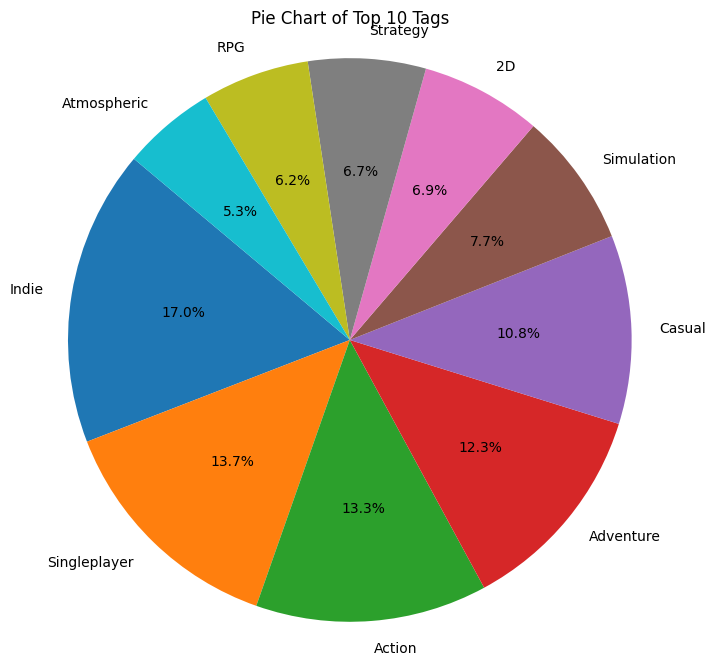

In [135]:
# count the number of unique value in the tags column
value_counts_series_t10 = df_clean_t1['tags'].value_counts().head(10)

# Plotting the pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(value_counts_series_t10, labels=value_counts_series_t10.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Top 10 Tags')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()

In [136]:
value_counts_series_t10

tags
Indie           28043
Singleplayer    22679
Action          21942
Adventure       20269
Casual          17862
Simulation      12716
2D              11443
Strategy        11139
RPG             10170
Atmospheric      8809
Name: count, dtype: int64

The top 10 tags at least covered more than 50% of the records, so we only keep the top 10 tags in the dataframe.

In [137]:
# create list of top 10 most common tags
top10_tag = value_counts_series_t10.index.tolist()

# set up the list of columns that are not going to drop
allowed_columns = top10_tag + groupby_columns

# drop columns that are not in the 'allowed_columns' list
filtered_df = aggregated_df.drop(columns=[col for col in aggregated_df.columns if col not in allowed_columns])

filtered_df

,app_id,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,positive_YN,...,2D,Action,Adventure,Atmospheric,Casual,Indie,RPG,Simulation,Singleplayer,Strategy
0,20,True,True,True,85,5146,4.99,4.99,0.0,1,...,False,True,False,False,False,False,False,False,False,False
1,30,True,True,True,87,3489,4.99,4.99,0.0,1,...,False,True,False,False,False,False,False,False,True,True
2,40,True,True,True,79,1757,4.99,4.99,0.0,1,...,False,True,False,False,False,False,False,False,False,False
3,50,True,True,True,95,14057,4.99,4.99,0.0,1,...,False,True,True,True,False,False,False,False,True,False
4,60,True,True,True,80,3395,4.99,4.99,0.0,1,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49875,2466750,True,False,False,90,11,0.99,0.99,0.0,1,...,True,True,False,False,True,True,True,False,True,False
49876,2470720,True,False,False,100,12,4.49,4.99,10.0,1,...,False,True,False,False,False,True,True,False,False,True
49877,2471820,True,False,False,60,23,1.39,1.99,30.0,0,...,False,True,True,True,False,False,True,True,True,False
49878,2478270,True,False,False,100,14,0.00,0.00,0.0,1,...,False,False,True,False,False,False,False,False,True,False


Now the dataframe only has 49880 rows × 21 columns

In [138]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49880 entries, 0 to 49879
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          49880 non-null  int64  
 1   win             49880 non-null  bool   
 2   mac             49880 non-null  bool   
 3   linux           49880 non-null  bool   
 4   positive_ratio  49880 non-null  int64  
 5   user_reviews    49880 non-null  int64  
 6   price_final     49880 non-null  float64
 7   price_original  49880 non-null  float64
 8   discount        49880 non-null  float64
 9   positive_YN     49880 non-null  int64  
 10  discount_YN     49880 non-null  int64  
 11  2D              49880 non-null  bool   
 12  Action          49880 non-null  bool   
 13  Adventure       49880 non-null  bool   
 14  Atmospheric     49880 non-null  bool   
 15  Casual          49880 non-null  bool   
 16  Indie           49880 non-null  bool   
 17  RPG             49880 non-null 

In [139]:
filtered_df.columns

Index(['app_id', 'win', 'mac', 'linux', 'positive_ratio', 'user_reviews',
       'price_final', 'price_original', 'discount', 'positive_YN',
       'discount_YN', '2D', 'Action', 'Adventure', 'Atmospheric', 'Casual',
       'Indie', 'RPG', 'Simulation', 'Singleplayer', 'Strategy'],
      dtype='object')

In [140]:
# drop the 'app_id' column

filtered_df_lr = filtered_df.drop(['app_id'], axis=1)

                     win       mac     linux  positive_ratio  user_reviews  \
win             1.000000  0.073996  0.057952       -0.104481      0.019422   
mac             0.073996  1.000000  0.627093        0.074014      0.041757   
linux           0.057952  0.627093  1.000000        0.070869      0.039240   
positive_ratio -0.104481  0.074014  0.070869        1.000000      0.076813   
user_reviews    0.019422  0.041757  0.039240        0.076813      1.000000   
price_final     0.037706 -0.012953 -0.022192        0.008739      0.146287   
price_original  0.041673 -0.019809 -0.024743        0.015466      0.156898   
discount        0.013787 -0.037042 -0.017320        0.005176      0.003756   
positive_YN    -0.067381  0.065490  0.061244        0.824987      0.070062   
discount_YN     0.013534 -0.040645 -0.019189        0.029807      0.001241   
2D              0.064870  0.083874  0.072184        0.189273     -0.002145   
Action          0.046027 -0.109596 -0.050276       -0.033128    

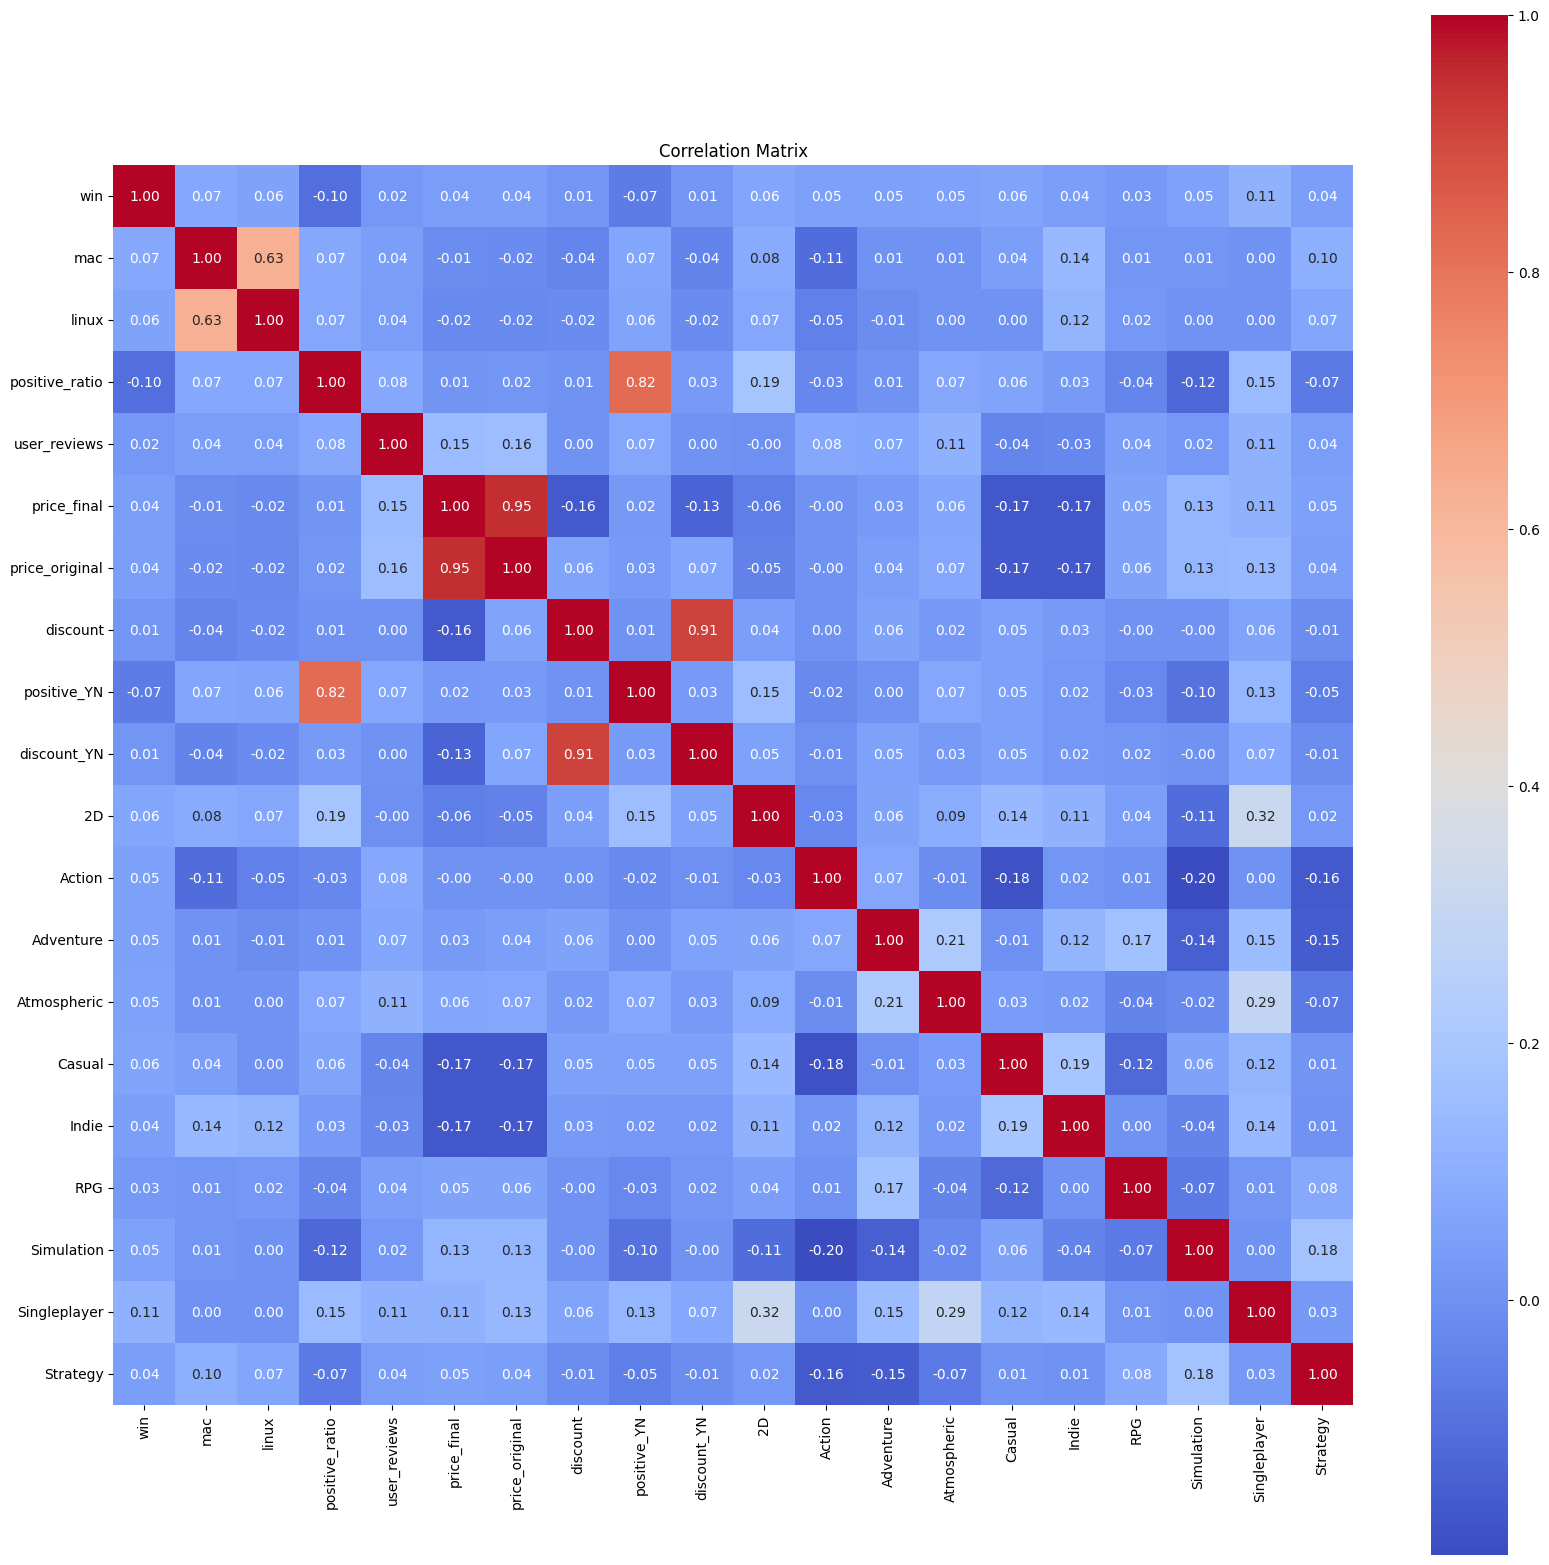

In [141]:
# Get all column names as a list
column_names = filtered_df_lr.columns.tolist()


# Combine all column names into a single variable
correlation_matrix = filtered_df_lr[column_names].corr()

print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

In [142]:
filtered_df_lr.columns

Index(['win', 'mac', 'linux', 'positive_ratio', 'user_reviews', 'price_final',
       'price_original', 'discount', 'positive_YN', 'discount_YN', '2D',
       'Action', 'Adventure', 'Atmospheric', 'Casual', 'Indie', 'RPG',
       'Simulation', 'Singleplayer', 'Strategy'],
      dtype='object')

## Model

In [143]:
log = LogisticRegression(max_iter=2000)
nb = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC(probability=True)

In [144]:
''' X = filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','app_id','discount'])
y = filtered_df_lr['positive_YN']

# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Range of regularization parameters
    'penalty': ['l1', 'l2'],     # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']      # Solver to use for optimization
}

logistic_model = LogisticRegression()

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# extract the best params
best_params = grid_search.best_params_

# extract the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1) '''


' X = filtered_df_lr.drop(columns=[\'positive_YN\', \'positive_ratio\',\'app_id\',\'discount\'])\ny = filtered_df_lr[\'positive_YN\']\n\n# Assuming you have your data in X (features) and y (target) format\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nparam_grid = {\n    \'C\': np.logspace(-3, 3, 7),  # Range of regularization parameters\n    \'penalty\': [\'l1\', \'l2\'],     # Regularization type (\'l1\' for Lasso, \'l2\' for Ridge)\n    \'solver\': [\'liblinear\']      # Solver to use for optimization\n}\n\nlogistic_model = LogisticRegression()\n\ngrid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)\ngrid_search.fit(X_train, y_train)\n\n# extract the best params\nbest_params = grid_search.best_params_\n\n# extract the best model\nbest_model = grid_search.best_estimator_\n\n# Make predictions on the test set\ny_pred = best_model.predict(X_test)\n\n# Calculate metrics\naccuracy = accuracy_score(y_test, y_pred)\nprecisio

Print coef

In [145]:
''' # Print the coefficients
coefficients = best_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to store coefficients with corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print(coefficients_df)'''

" # Print the coefficients\ncoefficients = best_model.coef_[0]\nfeature_names = X.columns\n\n# Create a DataFrame to store coefficients with corresponding feature names\ncoefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})\n\nprint(coefficients_df)"

In [146]:
''' # logistic regression 2 - Oversampling (SMOTE - Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

X = filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','app_id','discount'])
y = filtered_df_lr['positive_YN']

# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Range of regularization parameters
    'penalty': ['l1', 'l2'],     # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']      # Solver to use for optimization
}

logistic_model = LogisticRegression()

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# extract the best params
best_params = grid_search.best_params_

# extract the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1) ''' 


' # logistic regression 2 - Oversampling (SMOTE - Synthetic Minority Over-sampling Technique)\nfrom imblearn.over_sampling import SMOTE\n\nX = filtered_df_lr.drop(columns=[\'positive_YN\', \'positive_ratio\',\'app_id\',\'discount\'])\ny = filtered_df_lr[\'positive_YN\']\n\n# Assuming you have your data in X (features) and y (target) format\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Apply SMOTE to the training set\noversampler = SMOTE(random_state=42)\nX_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)\n\nparam_grid = {\n    \'C\': np.logspace(-3, 3, 7),  # Range of regularization parameters\n    \'penalty\': [\'l1\', \'l2\'],     # Regularization type (\'l1\' for Lasso, \'l2\' for Ridge)\n    \'solver\': [\'liblinear\']      # Solver to use for optimization\n}\n\nlogistic_model = LogisticRegression()\n\ngrid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)\ngrid_search.fit(X_train_resa

In [147]:
''' # logistic regression 3 - Oversampling (SMOTE - Synthetic Minority Over-sampling Technique)
from imblearn.under_sampling import RandomUnderSampler

X = filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','app_id','discount'])
y = filtered_df_lr['positive_YN']

# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the training set
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Range of regularization parameters
    'penalty': ['l1', 'l2'],     # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']      # Solver to use for optimization
}

logistic_model = LogisticRegression()

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# extract the best params
best_params = grid_search.best_params_

# extract the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1) '''


' # logistic regression 3 - Oversampling (SMOTE - Synthetic Minority Over-sampling Technique)\nfrom imblearn.under_sampling import RandomUnderSampler\n\nX = filtered_df_lr.drop(columns=[\'positive_YN\', \'positive_ratio\',\'app_id\',\'discount\'])\ny = filtered_df_lr[\'positive_YN\']\n\n# Assuming you have your data in X (features) and y (target) format\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Apply Random Under-Sampling to the training set\nundersampler = RandomUnderSampler(random_state=42)\nX_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)\n\nparam_grid = {\n    \'C\': np.logspace(-3, 3, 7),  # Range of regularization parameters\n    \'penalty\': [\'l1\', \'l2\'],     # Regularization type (\'l1\' for Lasso, \'l2\' for Ridge)\n    \'solver\': [\'liblinear\']      # Solver to use for optimization\n}\n\nlogistic_model = LogisticRegression()\n\ngrid_search = GridSearchCV(logistic_model, param_grid, c

In [148]:
''' from imblearn.over_sampling import ADASYN

X = filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','app_id','discount'])
y = filtered_df_lr['positive_YN']

# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the training set
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Range of regularization parameters
    'penalty': ['l1', 'l2'],     # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']      # Solver to use for optimization
}

logistic_model = LogisticRegression()

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# extract the best params
best_params = grid_search.best_params_

# extract the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1) '''

' from imblearn.over_sampling import ADASYN\n\nX = filtered_df_lr.drop(columns=[\'positive_YN\', \'positive_ratio\',\'app_id\',\'discount\'])\ny = filtered_df_lr[\'positive_YN\']\n\n# Assuming you have your data in X (features) and y (target) format\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Apply Random Under-Sampling to the training set\nadasyn = ADASYN(random_state=42)\nX_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)\n\nparam_grid = {\n    \'C\': np.logspace(-3, 3, 7),  # Range of regularization parameters\n    \'penalty\': [\'l1\', \'l2\'],     # Regularization type (\'l1\' for Lasso, \'l2\' for Ridge)\n    \'solver\': [\'liblinear\']      # Solver to use for optimization\n}\n\nlogistic_model = LogisticRegression()\n\ngrid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)\ngrid_search.fit(X_train_resampled, y_train_resampled)\n\n# extract the best params\nbest_params = grid_search.bes

In [149]:
'''from imblearn.combine import SMOTETomek

X = filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','app_id','discount'])
y = filtered_df_lr['positive_YN']

# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTETomek to the training set
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Range of regularization parameters
    'penalty': ['l1', 'l2'],     # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']      # Solver to use for optimization
}

logistic_model = LogisticRegression()

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# extract the best params
best_params = grid_search.best_params_

# extract the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)'''

'from imblearn.combine import SMOTETomek\n\nX = filtered_df_lr.drop(columns=[\'positive_YN\', \'positive_ratio\',\'app_id\',\'discount\'])\ny = filtered_df_lr[\'positive_YN\']\n\n# Assuming you have your data in X (features) and y (target) format\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Apply SMOTETomek to the training set\nsmote_tomek = SMOTETomek(random_state=42)\nX_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)\n\nparam_grid = {\n    \'C\': np.logspace(-3, 3, 7),  # Range of regularization parameters\n    \'penalty\': [\'l1\', \'l2\'],     # Regularization type (\'l1\' for Lasso, \'l2\' for Ridge)\n    \'solver\': [\'liblinear\']      # Solver to use for optimization\n}\n\nlogistic_model = LogisticRegression()\n\ngrid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)\ngrid_search.fit(X_train_resampled, y_train_resampled)\n\n# extract the best params\nbest_params = grid_search.bes

In [150]:
'''from imblearn.over_sampling import RandomOverSampler

X = filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','app_id','discount'])
y = filtered_df_lr['positive_YN']

# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Over-Sampling with Replacement to the training set
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Range of regularization parameters
    'penalty': ['l1', 'l2'],     # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']      # Solver to use for optimization
}

logistic_model = LogisticRegression()

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# extract the best params
best_params = grid_search.best_params_

# extract the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1) '''

'from imblearn.over_sampling import RandomOverSampler\n\nX = filtered_df_lr.drop(columns=[\'positive_YN\', \'positive_ratio\',\'app_id\',\'discount\'])\ny = filtered_df_lr[\'positive_YN\']\n\n# Assuming you have your data in X (features) and y (target) format\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Apply Random Over-Sampling with Replacement to the training set\nros = RandomOverSampler(random_state=42)\nX_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)\n\nparam_grid = {\n    \'C\': np.logspace(-3, 3, 7),  # Range of regularization parameters\n    \'penalty\': [\'l1\', \'l2\'],     # Regularization type (\'l1\' for Lasso, \'l2\' for Ridge)\n    \'solver\': [\'liblinear\']      # Solver to use for optimization\n}\n\nlogistic_model = LogisticRegression()\n\ngrid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)\ngrid_search.fit(X_train_resampled, y_train_resampled)\n\n# extract the best params

In [151]:
# use the tags as the feature

X = np.array(filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','discount']))
y = np.array(filtered_df_lr['positive_YN'])

In [152]:
# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
log.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC(probability=True)

In [154]:
pred_l = log.predict(X_test)
pred_nb = nb.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svc = svc.predict(X_test)

In [155]:
print(f1_score(pred_l, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_knn, y_test))
print(f1_score(pred_svc, y_test))

0.8324260355029586
0.5997523876901308
0.7894053492599324
0.8355996498395097


In [156]:
print(accuracy_score(pred_l, y_test))
print(accuracy_score(pred_nb, y_test))
print(accuracy_score(pred_knn, y_test))
print(accuracy_score(pred_svc, y_test))

0.7161186848436247
0.5463111467522053
0.6748195669607057
0.7176222935044105


By looking at the F1 score and accuracy rate 

In [157]:
pred_l_prob = log.predict_proba(X_test)

In [158]:
fpr, tpr, thresholds = roc_curve(y_test, pred_l_prob[:,1])

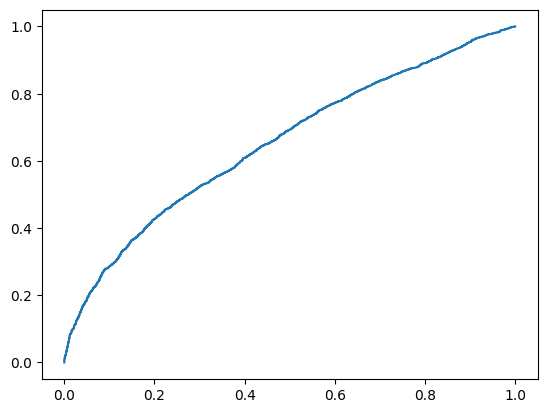

In [159]:
plt.plot(fpr, tpr)

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create a LogisticRegression model with increased max_iter
logistic_reg = LogisticRegression(max_iter=5000)  # Increase max_iter to a larger value

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled data
logistic_reg.fit(X_train_scaled, y_train)

# Define the hyperparameter search space as a dictionary
log_reg_params = {
    'C': np.logspace(-2, 2, 100),  # Narrow down the range of C values
    'penalty': ['l2'],  # Use 'l2' penalty instead of 'l1'
    'solver': ['liblinear', 'newton-cg', 'lbfgs']  # Try different solvers
}

# Perform the hyperparameter tuning using RandomizedSearchCV with cross-validation
rs_log_reg = RandomizedSearchCV(logistic_reg, log_reg_params, n_iter=200, cv=10, scoring='f1', random_state=42)
rs_log_reg.fit(X_train_scaled, y_train)

# Retrieve the best estimator from the RandomizedSearchCV
best_log_reg_estimator = rs_log_reg.best_estimator_


In [161]:
best_log_reg_estimator 

LogisticRegression(C=0.01, max_iter=5000)

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create a KNeighborsClassifier model
knn = KNeighborsClassifier()

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Fit the KNeighborsClassifier model on the scaled data
knn.fit(X_train_scaled, y_train)

# Define the hyperparameter search space as a dictionary
knn_params = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform the hyperparameter tuning using RandomizedSearchCV with cross-validation
rs_knn = RandomizedSearchCV(knn, knn_params, n_iter=50, cv=5, scoring='f1', random_state=42)
rs_knn.fit(X_train_scaled, y_train)

# Retrieve the best estimator from the RandomizedSearchCV
best_knn_estimator = rs_knn.best_estimator_



In [163]:
best_knn_estimator

KNeighborsClassifier(metric='manhattan', n_neighbors=19)

In [164]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create an SVC model
svc = SVC()

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Fit the SVC model on the scaled data
svc.fit(X_train_scaled, y_train)

# Define the hyperparameter search space as a dictionary
svc_params = {
    'C': np.logspace(-4, 4, 50),        # Reduced number of values for penalty parameter C
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto']           # Kernel coefficient for 'rbf' and 'poly'
}

# Perform the hyperparameter tuning using RandomizedSearchCV with cross-validation
rs_svc = RandomizedSearchCV(svc, svc_params, n_iter=50, cv=5, scoring='f1', random_state=42)
rs_svc.fit(X_train_scaled, y_train)

# Retrieve the best estimator from the RandomizedSearchCV
best_svc_estimator = rs_svc.best_estimator_


KeyboardInterrupt: 

In [ ]:
best_svc_estimator

In [ ]:
pred_svc_prob = svc.predict_proba(X_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_svc_prob[:,1])

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
best_log_reg

In [ ]:
knn_params = {'n_neighbors':range(3,300)}

rs_knn = RandomizedSearchCV(knn, knn_params, n_iter=200, cv=10, scoring='f1')
rs_knn.fit(X_train,y_train)
rs_knn.best_estimator_

In [ ]:
svc_params = {'kernel':['linear','rbf']}

rs_svc = RandomizedSearchCV(svc, svc_params, n_iter=3, cv=10, scoring='f1')
rs_svc.fit(X_train, y_train)
rs_svc.best_estimator_ 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Apply the same scaling to X_test

# Create and train the models
log_best = LogisticRegression(C=1.592282793341094, penalty='l1', solver='saga')
knn_best = KNeighborsClassifier(n_neighbors=283)

log_best.fit(X_train_scaled, y_train)
knn_best.fit(X_train_scaled, y_train)

# Make predictions
pred_log_best = log_best.predict(X_test_scaled)
pred_knn_best = knn_best.predict(X_test_scaled)

# Evaluate the models
print(f"F1 score for Logistic Regression: {f1_score(pred_log_best, y_test)}")
print(f"F1 score for KNN: {f1_score(pred_knn_best, y_test)}")
